In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from google.colab import files
from sklearn.model_selection import train_test_split

In [ ]:

dataset = files.upload()

Saving TSLA.csv to TSLA.csv


In [134]:
df = pd.read_csv('TSLA.csv')
%matplotlib inline

In [135]:
df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
152,2011-02-07,4.652000,4.652000,4.576000,4.614000,4.614000,4475500
2003,2018-06-15,70.767998,72.933998,70.250000,71.634003,71.634003,54241500
1430,2016-03-08,40.700001,41.500000,40.439999,40.520000,40.520000,20893500
340,2011-11-03,6.000000,6.498000,5.906000,6.492000,6.492000,12548500
779,2013-08-06,28.950001,29.146000,28.219999,28.430000,28.430000,46272500


In [136]:
df["Close"].describe()

count    2392.000000
mean       36.657329
std        22.889387
min         3.160000
25%         6.869500
50%        42.334000
75%        52.780499
max        86.188004
Name: Close, dtype: float64

In [137]:
df = df['Close'].values
df = df.reshape(-1, 1)

In [138]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [139]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [140]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [141]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [142]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [143]:
# Building Lstm model

model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [144]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [145]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [146]:


model.fit(x_train, y_train, epochs=30, batch_size=30)


Epoch 1/30
63/63 [==============================] - 17s 161ms/step - loss: 0.0172
Epoch 2/30
63/63 [==============================] - 10s 161ms/step - loss: 0.0037
Epoch 3/30
63/63 [==============================] - 10s 161ms/step - loss: 0.0033
Epoch 4/30
63/63 [==============================] - 10s 165ms/step - loss: 0.0036
Epoch 5/30
63/63 [==============================] - 10s 163ms/step - loss: 0.0029
Epoch 6/30
63/63 [==============================] - 10s 162ms/step - loss: 0.0025
Epoch 7/30
63/63 [==============================] - 10s 162ms/step - loss: 0.0025
Epoch 8/30
63/63 [==============================] - 10s 164ms/step - loss: 0.0025
Epoch 9/30
63/63 [==============================] - 10s 161ms/step - loss: 0.0023
Epoch 10/30
63/63 [==============================] - 10s 160ms/step - loss: 0.0024
Epoch 11/30
63/63 [==============================] - 10s 162ms/step - loss: 0.0024
Epoch 12/30
63/63 [==============================] - 10s 160ms/step - loss: 0.0022
Epoch 13/30
6

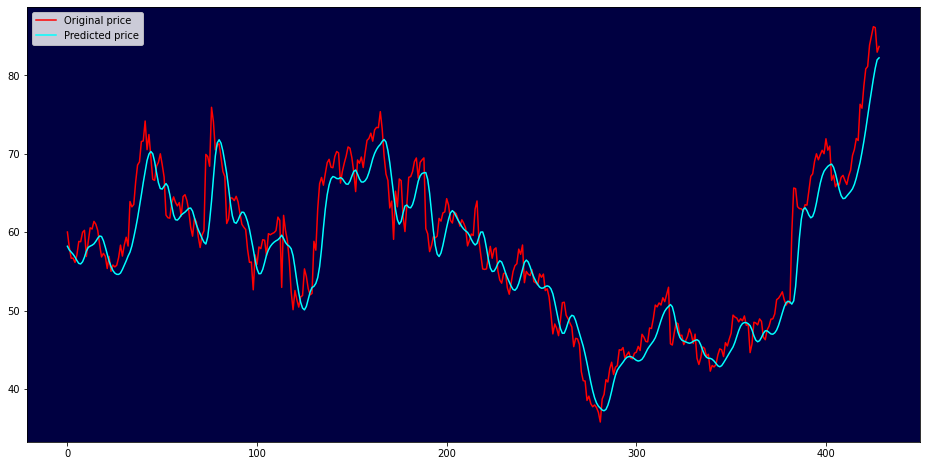

In [147]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()